<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity

In [22]:
os.chdir('../')

In [7]:
data_path = 'data/interim/pcc_0525/'
data_path_norm = 'data/interim/pcc_0603'
with open(f'{data_path}/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)
with open(f'{data_path_norm}/pcc.pickle','rb') as f:
    e_pcc_norm = pickle.load(f)


In [23]:
e_pcc.figure_path='reports/figures/pcc_0603/embedding/'
e_pcc_norm.figure_path = 'reports/figures/pcc_0603/embedding_norm/'

In [130]:
pp_ = nx.spring_layout(e_pcc.graph_gc)

In [14]:
pp  =  nx.spring_layout(e_pcc_norm.graph_gc)

(-0.001, 0.001)

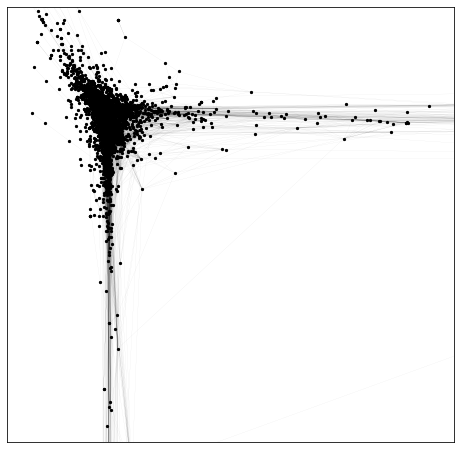

In [138]:
pos = e_pcc.gnm.getEigvecs()[:,:2]

nx.set_node_attributes(e_pcc.graph_gc,dict(zip([i for i in e_pcc.graph_gc.nodes],pos)),'pos')
ax = e_pcc.plot_network_spring(figsize=(8,8),node_size=5,node_color='black',edge_color='black',facecolor='white')
ax.set_xlim(-0.001,0.001)
ax.set_ylim(-0.001,0.001)

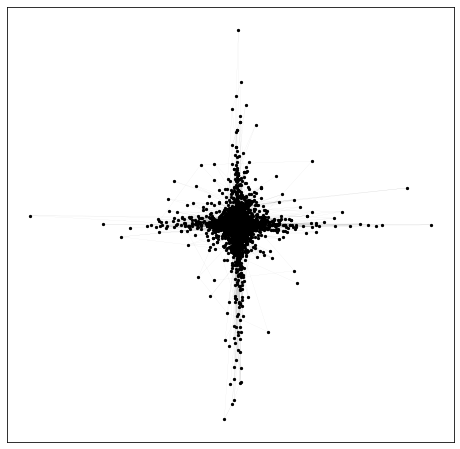

In [144]:
sensors = e_pcc.df.loc[e_pcc.df['sens']>np.quantile(e_pcc.df['sens'],0.99)].orf_name.values
eff = e_pcc.df.loc[e_pcc.df['eff']>np.quantile(e_pcc.df['eff'],0.99)].orf_name.values

pos = e_pcc.gnm.getEigvecs()[:,e_pcc.coll_index_sorted[:2]]

nx.set_node_attributes(e_pcc.graph_gc,dict(zip([i for i in e_pcc.graph_gc.nodes],pos)),'pos')
ax = e_pcc.plot_network_spring(figsize=(8,8),node_size=5,node_color='black',edge_color='black',facecolor='white')
#ax.set_xlim(-0.05,0.05)
#ax.set_ylim(-0.05,0.05)
#nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc.graph_gc,sensors),ax=ax,node_color='red',node_size=1,pos=e_pcc.graph_gc.nodes('pos'))
#nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc.graph_gc,eff),ax=ax,node_color='m',node_size=1,pos=e_pcc.graph_gc.nodes('pos'))

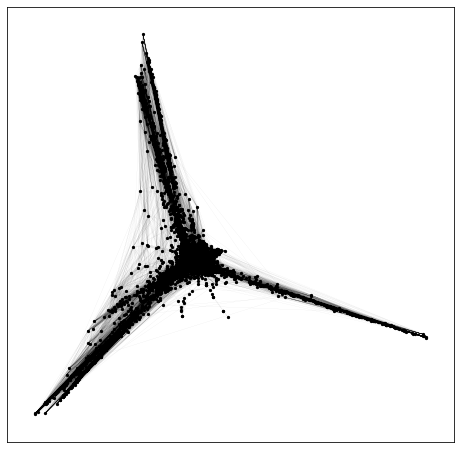

In [145]:
pos = e_pcc_norm.gnm.getEigvecs()[:,:2]

nx.set_node_attributes(e_pcc_norm.graph_gc,dict(zip([i for i in e_pcc_norm.graph_gc.nodes],pos)),'pos')
ax = e_pcc_norm.plot_network_spring(figsize=(8,8),node_size=5,node_color='black',edge_color='black',facecolor='white')
#nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc_norm.graph_gc,sensors),ax=ax,node_color='red',node_size=1,pos=e_pcc_norm.graph_gc.nodes('pos'))
#nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc_norm.graph_gc,eff),ax=ax,node_color='m',node_size=1,pos=e_pcc_norm.graph_gc.nodes('pos'))

(-0.005, 0.005)

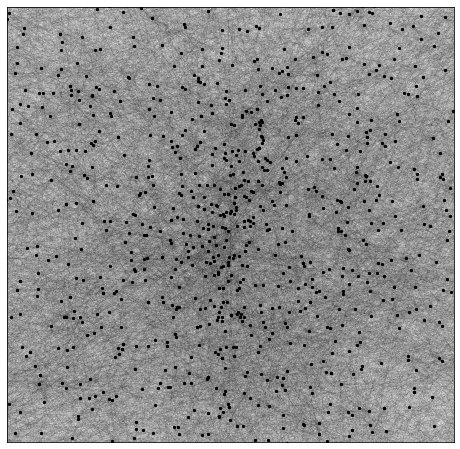

In [148]:
pos = e_pcc_norm.gnm.getEigvecs()[:,e_pcc_norm.coll_index_sorted[:2]]

nx.set_node_attributes(e_pcc_norm.graph_gc,dict(zip([i for i in e_pcc_norm.graph_gc.nodes],pos)),'pos')
ax = e_pcc_norm.plot_network_spring(figsize=(8,8),node_size=5,node_color='black',edge_color='black',facecolor='white')
ax.set_xlim(-0.005,0.005)
ax.set_ylim(-0.005,0.005)
#nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc_norm.graph_gc,sensors),ax=ax,node_color='red',node_size=1,pos=e_pcc_norm.graph_gc.nodes('pos'))
#nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc_norm.graph_gc,eff),ax=ax,node_color='m',node_size=1,pos=e_pcc_norm.graph_gc.nodes('pos'))

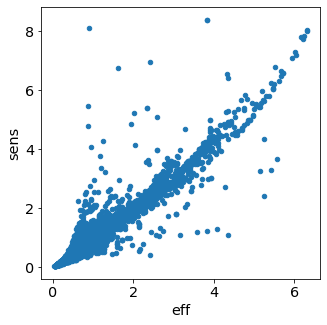

In [42]:
e_pcc_norm.df.plot.scatter(x='eff',y='sens')

In [43]:
from enm.visualize.visualize import heatmap_annotated

In [70]:
import scipy.cluster.hierarchy as sch 
import copy

In [75]:
cov = copy.deepcopy(e_pcc.gnm.getCovariance())
q99 = np.quantile(cov,0.95)
cov[cov>q99] = q99
rw = sch.linkage(sch.distance.pdist(cov), method ='ward')
rw

array([[3.46200000e+03, 3.46300000e+03, 7.21528491e-16, 2.00000000e+00],
       [4.60400000e+03, 4.60500000e+03, 1.06391106e-15, 2.00000000e+00],
       [4.09500000e+03, 4.09600000e+03, 1.08890767e-15, 2.00000000e+00],
       ...,
       [1.03180000e+04, 1.03470000e+04, 8.14861261e-01, 1.29600000e+03],
       [1.03600000e+04, 1.03610000e+04, 1.17639552e+00, 3.88700000e+03],
       [1.03620000e+04, 1.03630000e+04, 1.24101214e+00, 5.18300000e+03]])

In [78]:
0.7*max(rw[:,2])

0.8687084969797582

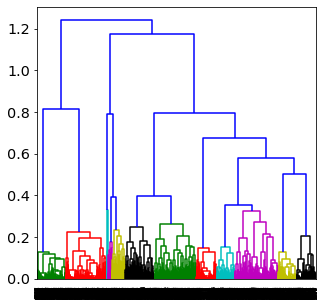

In [79]:
z1 = sch.dendrogram(rw, color_threshold=0.35)

In [88]:
cutree = sch.cut_tree(rw, height=.35)

In [113]:
fcl = sch.fcluster(rw,t=0.35, criterion='distance')

In [117]:
e_pcc.df['cluster']=fcl

In [121]:
import seaborn as sns
palette = sns.color_palette("hls", 12)


In [127]:
palette[0]

(0.86, 0.3712, 0.33999999999999997)

In [ ]:
e_pcc.spring_pos()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

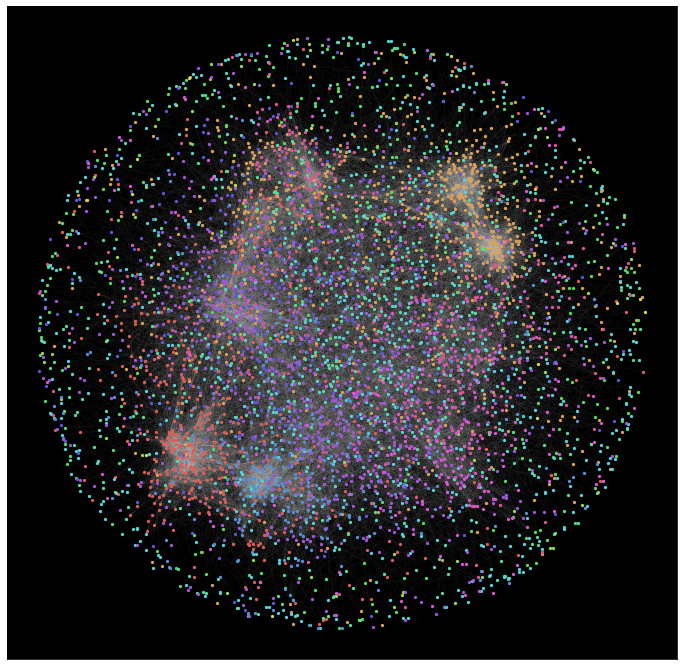

In [129]:

ax = e_pcc.plot_network_spring(figsize=(12,12))
for i in range(12):
    o_names = e_pcc.df.loc[e_pcc.df['cluster']==(i+1)].orf_name.values
    nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc.graph_gc,o_names),node_color= palette[i],ax=ax,pos=e_pcc.graph_gc.nodes('pos'),node_size=5)
    

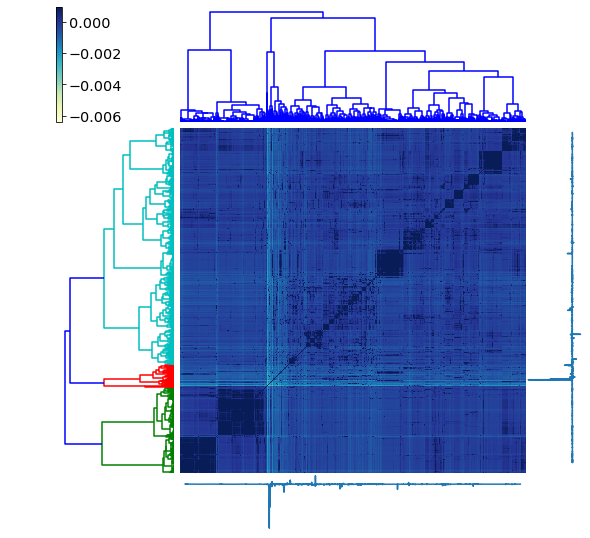

In [46]:
heatmap_annotated(e_pcc.gnm.getCovariance(),figure_path=e_pcc.figure_path)

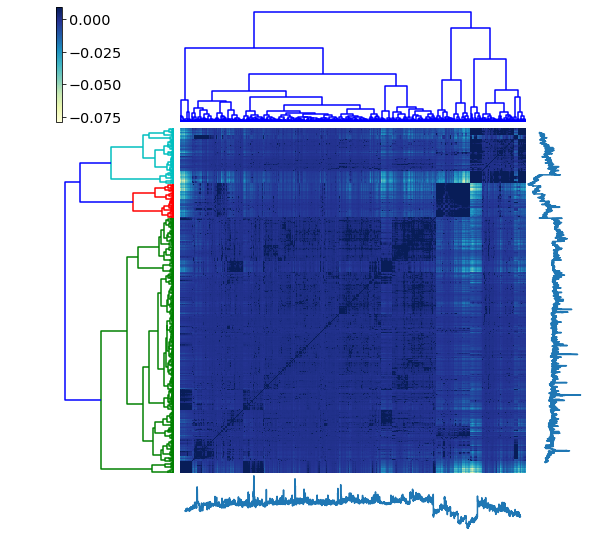

In [45]:
heatmap_annotated(e_pcc_norm.gnm.getCovariance(),figure_path=e_pcc_norm.figure_path)

In [49]:
sensors = e_pcc_norm.df.loc[e_pcc_norm.df['sens']>np.quantile(e_pcc_norm.df['sens'],0.99)].orf_name.values

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


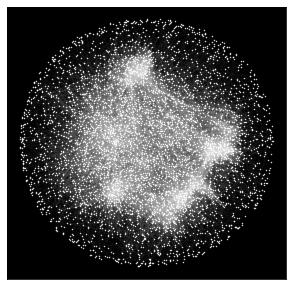

In [51]:
e_pcc_norm.spring_pos()


/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


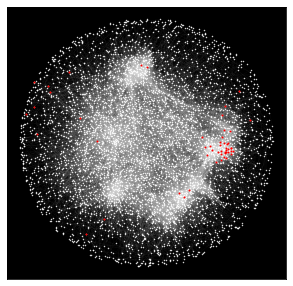

In [57]:
ax = e_pcc_norm.plot_network_spring()
nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc_norm.graph_gc,sensors),ax=ax,node_color='red',node_size=1,pos=e_pcc_norm.graph_gc.nodes('pos'))

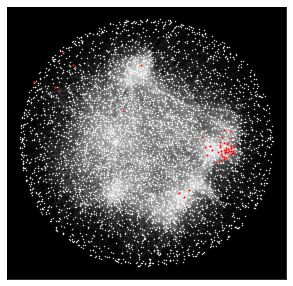

In [58]:
eff = e_pcc_norm.df.loc[e_pcc_norm.df['eff']>np.quantile(e_pcc_norm.df['eff'],0.99)].orf_name.values
ax = e_pcc_norm.plot_network_spring()
nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc_norm.graph_gc,eff),ax=ax,node_color='red',node_size=1,pos=e_pcc_norm.graph_gc.nodes('pos'))